In [ ]:
### This Jupyter Notebook visualises the link between river flow data and sensor data and how these datasets demonstrate an effect on water quality

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
flow_data =  pd.read_csv('datafiles/BathUGS_hrlyflows_070396to301019.csv',',')
flow_data['period']= flow_data["Date"].map(str) + flow_data["Time"].map(str)
flow_data["Date"]= pd.to_datetime(flow_data.Date)

print(flow_data['period'])

old_sensor_df = pd.read_csv('datafiles/WQ_watershed -2018 copy.csv', delimiter=',')
old_sensor_df['period']= old_sensor_df["Date"].map(str) + old_sensor_df["Time"].map(str)
#old_sensor_df["Date"]= pd.to_datetime(old_sensor_df.Date)

print(old_sensor_df['period'])


flow_sensordf = pd.merge(old_sensor_df, flow_data, on = 'period')
print(flow_sensordf)

In [ ]:

def outlierReduction(dirty_data, thresh):
    outliers = []
    outliers = dirty_data.rolling(window=3, center=True).median()
    difference = np.abs(dirty_data - outliers)
    outlier_idx = []
    for i in range(len(dirty_data)):    
        difference = np.abs(dirty_data[i] - outliers[i])
        if difference > threshold:
            outlier_idx.append(i)

    return dirty_data.drop(outlier_idx)
    

threshold = 0.1    
clean_conductivity_data = outlierReduction(flow_sensordf['Cond µS/cm'],threshold)
clean_flow_data = outlierReduction(flow_sensordf['value'], threshold)
clean_turbidity = outlierReduction(flow_sensordf['Turbidity FNU'], threshold)
clean_fDom = outlierReduction(flow_sensordf['fDOM QSU'],threshold)
print(clean_flow_data)

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(clean_conductivity_data/100, 'r')
ax.plot(clean_flow_data, 'm')
ax.plot(flow_sensordf['fDOM QSU'], 'g')
ax.plot(clean_fDom, 'r')



#fig.savefig('outlierfunc.png')




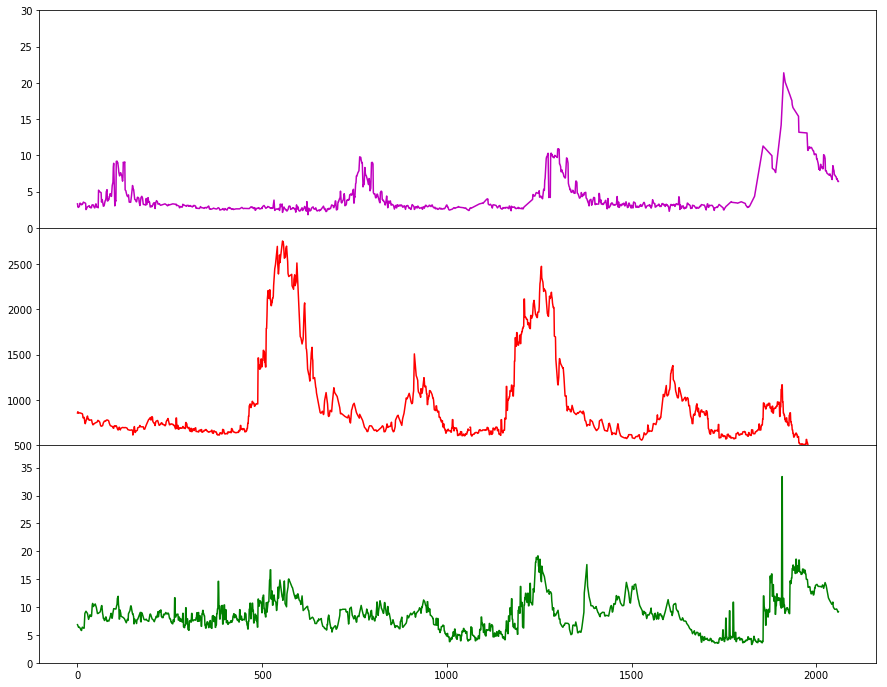

In [16]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(15,12))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)


# Plot each graph, and manually set the y tick values
axs[0].plot(clean_flow_data, 'm', label= 'River flow')
axs[0].set_ylim(0, 30)

axs[1].plot(clean_conductivity_data, 'r', label= 'Conductivity')
axs[1].set_ylim(500, 2900)

axs[2].plot(clean_turbidity, 'g', label= 'Turbidity')
axs[2].set_ylim(0, 39)

plt.grid
plt.show
fig.savefig('sensor_vs_flow2.png')

In [ ]:

flow_sensordf.corr(method = 'pearson')

In [17]:
print(type('a'))

<class 'str'>
